# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Read in the data set
df = pd.read_csv('ames.csv')

# Display the first few rows of the dataset
df.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [3]:
# Clean and pre-process the data if neccessary
# Check for missing values
print(df.isnull().sum())

# Drop or fill missing values (example: filling missing values 
# with mean)
df.fillna(df.mean(), inplace=True)

# Ensure data types are appropriate
df.dtypes

Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64


Year_Built        int64
Year_Remod_Add    int64
Total_Bsmt_SF     int64
First_Flr_SF      int64
Second_Flr_SF     int64
Gr_Liv_Area       int64
Full_Bath         int64
Half_Bath         int64
Bedroom_AbvGr     int64
Kitchen_AbvGr     int64
TotRms_AbvGrd     int64
Fireplaces        int64
Garage_Area       int64
Sale_Price        int64
dtype: object

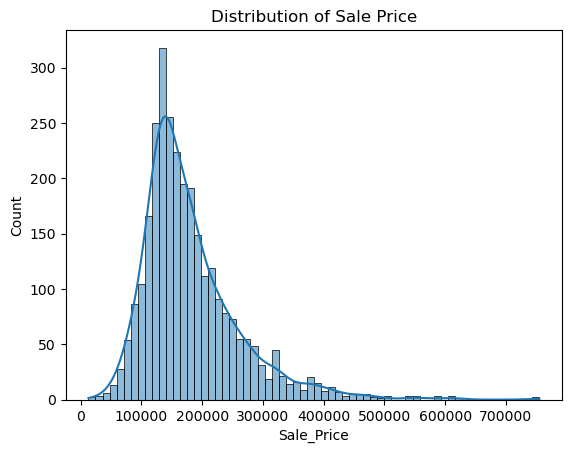

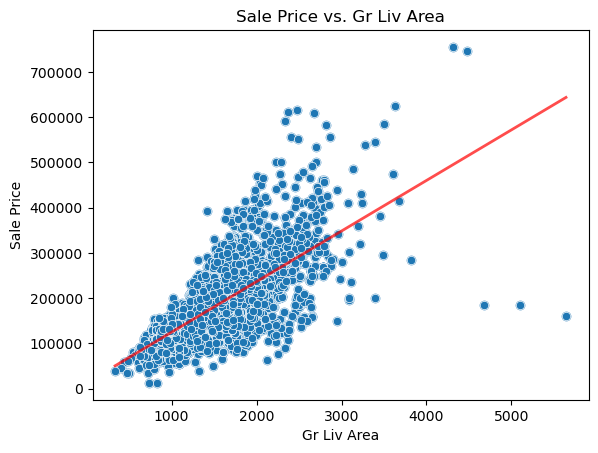

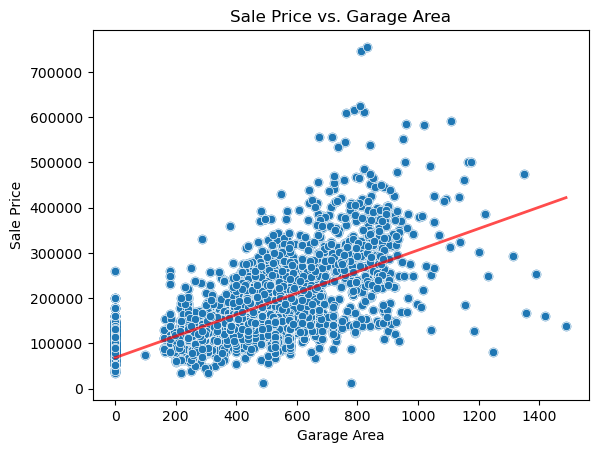

In [4]:
# Explore the data with visualisations such as histograms and 
# correlation matrices
# Histogram of the dependent variable ('Sale_Price')
sns.histplot(df.loc[:, df.columns[-1]], kde=True)
plt.title('Distribution of Sale Price')
plt.show()

# Scatter plots using specific slices for Gr_Liv_Area and Garage_Area
# Gr_Liv_Area loc[:,5] means the 6th column
sns.regplot(x=df.iloc[:, 5], y=df.iloc[:, -1], ci=None, 
            line_kws={"color":"r","alpha":0.7,"lw":2})
sns.scatterplot(x=df.loc[:, df.columns[5]], y=df.loc[:, df.columns[-1]])
plt.title('Sale Price vs. Gr Liv Area')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.show()

# Garage_Area using [:,-2] means the second last column, considering 
# all rows
sns.regplot(x=df.iloc[:, -2], y=df.iloc[:, -1], ci=None, 
            line_kws={"color":"r","alpha":0.7,"lw":2})
sns.scatterplot(x=df.iloc[:, -2], y=df.loc[:, df.columns[-1]])
plt.title('Sale Price vs. Garage Area')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

In [5]:
# Split the independent variables from the dependent variable
# Define independent variables
X = df.iloc[:, [5, -2]]  # Columns for Gr_Liv_Area and Garage_Area

# Define dependent variable
y = df.loc[:, df.columns[-1]]  # Last column as Sale_Price

             Gr_Liv_Area  Garage_Area  Sale_Price
Gr_Liv_Area     1.000000     0.483971    0.706780
Garage_Area     0.483971     1.000000    0.640138
Sale_Price      0.706780     0.640138    1.000000


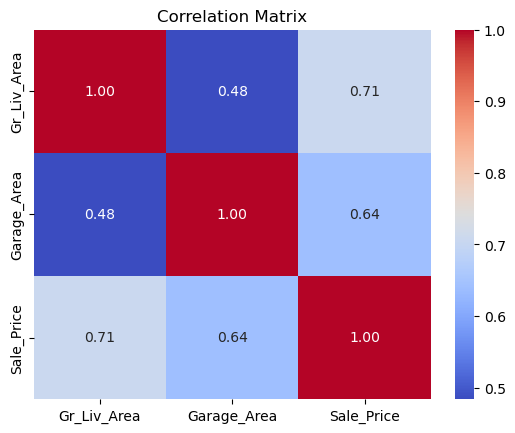

In [6]:
# Explore relationships between the independent and dependent variables
# Compute the correlation matrix
correlation_matrix = df.iloc[:, [5, -2, -1]].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot a heatmap for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Create a training and test set with a 75:25 split ratio
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [8]:
# Build a multiple linear regression model using 'Gr_Liv_Area' 
# and 'Garage_Area'
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Print the model intercept and coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Intercept: -5059.448195610545
Coefficients: [ 78.69286848 141.14571761]


In [10]:
# Generate predictions for the test set
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 51326.13252223676


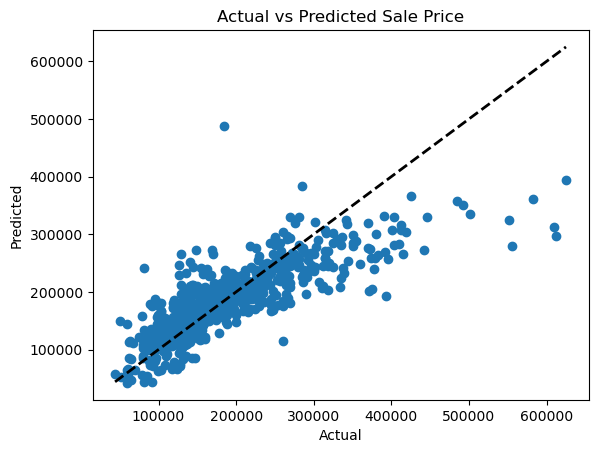

In [12]:
# Generate a plot
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sale Price')
plt.show()

In [13]:
# Print the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

             Coefficient
Gr_Liv_Area    78.692868
Garage_Area   141.145718


**Interpret coefficients in the context of the prediction:**
Gr_Liv_Area 78.692: This coefficient suggests that for each additional square foot of above-ground living area, the sale price is expected to increase by approximately $78.69, holding the garage area constant. This indicates a positive relationship between the size of the living area and the sale price.

Garage_Area 141.145: The coefficient for the garage area suggests that for each additional square foot of garage space, the sale price is expected to increase by approximately $141.15, holding the living area constant. This implies that garage space is a significant contributor to the sale price, potentially more than living area.

***Summarise findings***

**Distribution of Sale Price:**
The sale prices are positively skewed, with most homes clustered around a central price range and a few outliers at the higher end. This skewness suggests that while most homes fall within a moderate price range, there are some exceptionally high-priced properties.

**Relationship Between Independent and Dependent Variables:**
Gr_Liv_Area vs. SalePrice:
A positive correlation was observed, with larger above-ground living areas generally associated with higher sale prices. The scatter plot with a line of best fit indicated a linear relationship, though there is some spread, suggesting other factors might influence sale prices.
Garage_Area vs. SalePrice:
Similarly, a positive relationship was noted between garage area and sale price, with larger garages correlating with higher sale prices. The line of best fit further supported this linear trend.

**Model Performance:**
Coefficients Interpretation:
Gr_Liv_Area: For every additional square foot of living area, the sale price is expected to increase by approximately $78.69, holding other factors constant.
Garage_Area: Each additional square foot of garage area is associated with an increase of approximately $141.15 in sale price, suggesting that garage space is a particularly strong driver of home value.

**Model Accuracy (RMSE: 51,326.13):**

The RMSE indicates that, on average, the model's predictions differ from the actual sale prices by about $51,326.13. While this gives a measure of prediction accuracy, the relatively high RMSE suggests that the model could be improved

**Conclusion**
The analysis shows clear relationships between the size of living and garage areas and home prices, with garage area having a particularly strong impact. However, the model's accuracy, as indicated by the RMSE, suggests there is room for improvement.
